In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/consumer-complaints-financial-products/Consumer_Complaints.csv


In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('/kaggle/input/consumer-complaints-financial-products/Consumer_Complaints.csv')
data.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Date received                  Product                  Sub-product  \
0    07/29/2013            Consumer Loan                 Vehicle loan   
1    07/29/2013  Bank account or service             Checking account   
2    07/29/2013  Bank account or service             Checking account   
3    07/29/2013  Bank account or service             Checking account   
4    07/29/2013                 Mortgage  Conventional fixed mortgage   

                                      Issue Sub-issue  \
0                Managing the loan or lease       NaN   
1                 Using a debit or ATM card       NaN   
2   Account opening, closing, or management       NaN   
3                  Deposits and withdrawals       NaN   
4  Loan servicing, payments, escrow account       NaN   

  Consumer complaint narrative Company public response  \
0                          NaN                     NaN   
1                          NaN                     NaN   
2                          NaN                     NaN   
3                          NaN                     NaN   
4                          NaN                     NaN   

                      Company State ZIP code            Tags  \
0       Wells Fargo & Company    VA    24540             NaN   
1       Wells Fargo & Company    CA    95992  Older American   
2           Santander Bank US    NY    10065             NaN   
3       Wells Fargo & Company    GA    30084             NaN   
4  Franklin Credit Management    CT    06106             NaN   

  Consumer consent provided? Submitted via Date sent to company  \
0                        NaN         Phone           07/30/2013   
1                        NaN           Web           07/31/2013   
2                        NaN           Fax           07/31/2013   
3                        NaN           Web           07/30/2013   
4                        NaN           Web           07/30/2013   

  Company response to consumer Timely response? Consumer disputed?  \
0      Closed with explanation              Yes                 No   
1      Closed with explanation              Yes                 No   
2                       Closed              Yes                 No   
3      Closed with explanation              Yes                 No   
4      Closed with explanation              Yes                 No   

   Complaint ID  
0        468882  
1        468889  
2        468879  
3        468949  
4        475823

In [3]:
print('Shape of the data', data.shape)
print('Number of columns ',data.shape[1])
print('Number of rows',data.shape[0] )
print('\n\nInformation of the data ', data.info())
print('\n\ndescribing the data',data.describe(include='object'))

Shape of the data (670598, 18)
Number of columns  18
Number of rows 670598
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670598 entries, 0 to 670597
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 670598 non-null  object
 1   Product                       670598 non-null  object
 2   Sub-product                   472396 non-null  object
 3   Issue                         670598 non-null  object
 4   Sub-issue                     269868 non-null  object
 5   Consumer complaint narrative  114704 non-null  object
 6   Company public response       145197 non-null  object
 7   Company                       670598 non-null  object
 8   State                         665293 non-null  object
 9   ZIP code                      665274 non-null  object
 10  Tags                          94730 non-null   object
 11  Consumer consent provided?    208151 non-n

In [4]:
print(data.isna().sum())

Date received                        0
Product                              0
Sub-product                     198202
Issue                                0
Sub-issue                       400730
Consumer complaint narrative    555894
Company public response         525401
Company                              0
State                             5305
ZIP code                          5324
Tags                            575868
Consumer consent provided?      462447
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?               41419
Complaint ID                         0
dtype: int64


In [5]:
print("Columns are : ",data.columns)

Columns are :  Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')


In [6]:
# let's see the glimpse of Issue 
data['Issue'][:10]

0                  Managing the loan or lease
1                   Using a debit or ATM card
2     Account opening, closing, or management
3                    Deposits and withdrawals
4    Loan servicing, payments, escrow account
5                    Deposits and withdrawals
6       Cont'd attempts collect debt not owed
7       Cont'd attempts collect debt not owed
8                           Billing statement
9    Loan servicing, payments, escrow account
Name: Issue, dtype: object

In [7]:
data.Issue.value_counts()

Loan modification,collection,foreclosure    106455
Incorrect information on credit report       86904
Loan servicing, payments, escrow account     70166
Cont'd attempts collect debt not owed        51590
Account opening, closing, or management      33347
                                             ...  
Lost or stolen money order                      34
Incorrect exchange rate                         21
Lender sold the property                         7
Lender damaged or destroyed vehicle              6
Lender damaged or destroyed property             1
Name: Issue, Length: 95, dtype: int64

In [8]:
data['Date received'] = pd.to_datetime(data['Date received'])
data['Date sent to company'] = pd.to_datetime(data['Date sent to company'])

In [9]:
# very first step was supposed to be this but I forget to do it .. so doing it now 
# remove spaces in columns name
data.columns = data.columns.str.replace(' ','_')

In [10]:
# lets' see how many issues company receives per day 
issues_perday = data.Date_received.dt.date.value_counts()


In [11]:
# importing visualization libraries 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as plt 
import plotly.express as px


In [12]:
fig = px.bar(x=issues_perday.index, y=issues_perday,
             title="Daily Issues",
            labels={ # replaces default labels by column name
                "x": "Daily Issues",  "y": "Freq"
            })
fig.show()

In [13]:
issues_permonth = data.Date_received.dt.month.value_counts()


In [14]:
fig = px.bar(x=issues_permonth.index, y=issues_permonth,
             title="Monthly Issues",
            labels={ # replaces default labels by column name
                "x": "Monthly Issues",  "y": "Freq"
            })
fig.show()

In [15]:
issues_yearly = data.Date_received.dt.year.value_counts()


In [16]:
fig = px.bar(x=issues_yearly.index, y=issues_yearly,
             title="Yearly Issues",
            labels={ # replaces default labels by column name
                "x": "Yearly Issues",  "y": "Freq"
            })
fig.show()

In [17]:
# Let's analyse the product column 
Product = data['Product'].value_counts()

In [18]:
fig = px.bar(x=Product.index, y=Product,
             title="Product Count",
            labels={ # replaces default labels by column name
                "x": "Product Name",  "y": "Issues"
            })
fig.show()

In [19]:
Sub = data['Sub-product'].value_counts()

In [20]:
fig = px.bar(x=Sub.index, y=Sub,
             title="Sub-Product Count",
            labels={ # replaces default labels by column name
                "x": "Sub-Product Name",  "y": "Issues"
            })
fig.show()

In [21]:

data[data['Sub-product'] == 'I do not know']['Product'].value_counts()

Debt collection    26024
Name: Product, dtype: int64

## Great so 26k from the product Debt Collection has no idea about their subproduct 

In [22]:
# Company response to consumer 
# analysing the √ Company response to consumer 

response = data['Company_response_to_consumer'].value_counts()

In [23]:
fig = px.bar(x=response.index, y=response,
             title="Response Count",
            labels={ # replaces default labels by column name
                "x": "Response Name",  "y": "Issues"
            })
fig.show()

In [24]:
#Company
company = data['Company'].value_counts()
fig = px.line(x=company.index, y=company,
               width=1200, height=900,
             title="Company Count",
            labels={ # replaces default labels by column name
                "x": "Company Name",  "y": "Issues"
            })
fig.show()

In [31]:
fig = px.parallel_categories(data[:500],
                            width=2500, 
                            height=900)
fig.show()


In [26]:
# Submitted via 
submitted = data.Submitted_via.value_counts()
fig = px.bar(x=submitted.index, y=submitted,
             title="submitted Count",
            labels={ # replaces default labels by column name
                "x": "submitted Name",  "y": "Issues"
            })
fig.show()

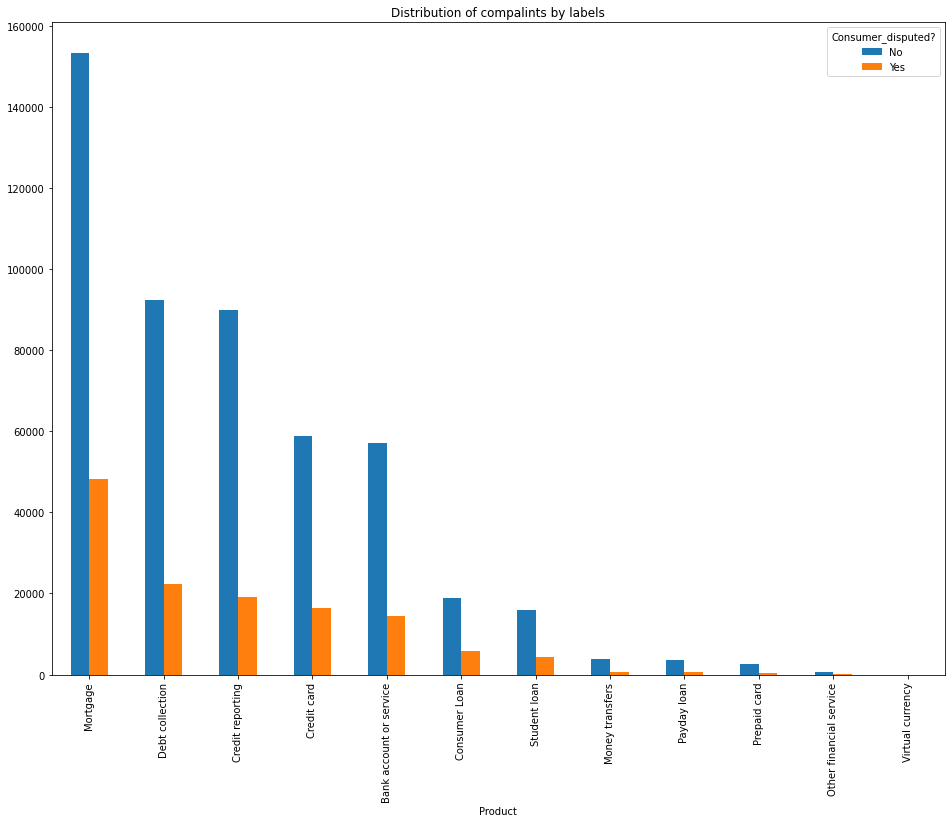

In [61]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,12)
#plt.figure(figsize=(20, 15))
pd.crosstab(data['Product'],data['Consumer_disputed?']).reset_index().set_index('Product').sort_values('No',ascending = False).plot(kind='bar',title = 'Distribution of compalints by labels')
plt.show()

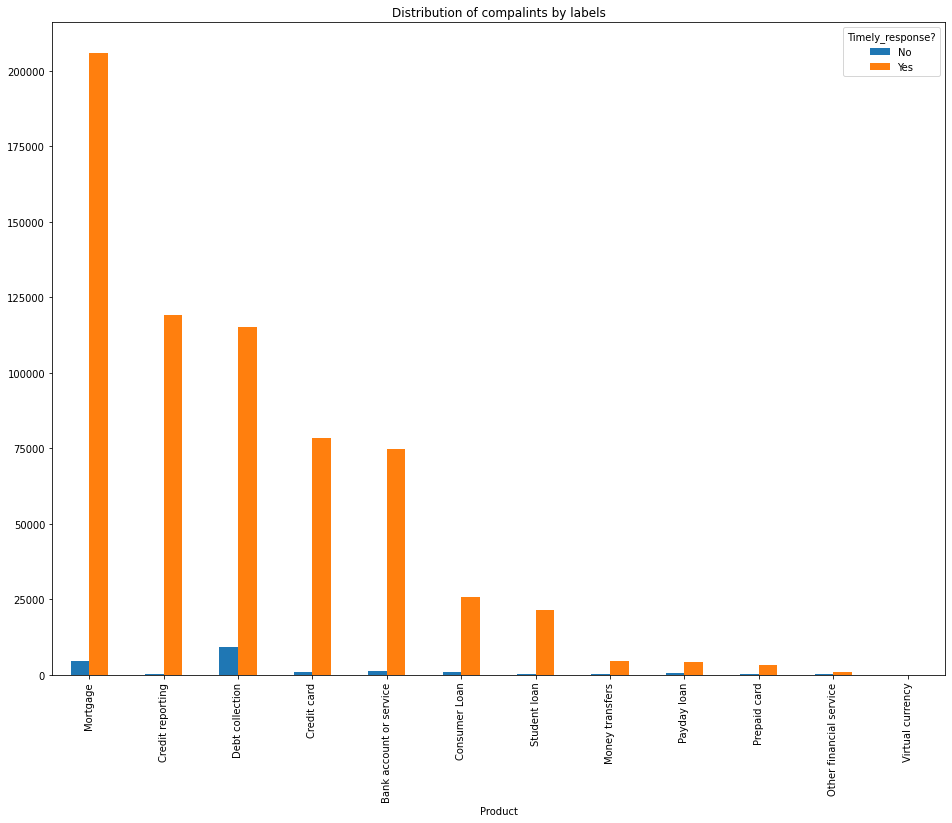

In [63]:
plt.rcParams["figure.figsize"] = (16,12)
#plt.figure(figsize=(20, 15))
pd.crosstab(data['Product'],data['Timely_response?']).reset_index().set_index('Product').sort_values('Yes',ascending = False).plot(kind='bar',title = 'Distribution of compalints by labels')
plt.show()

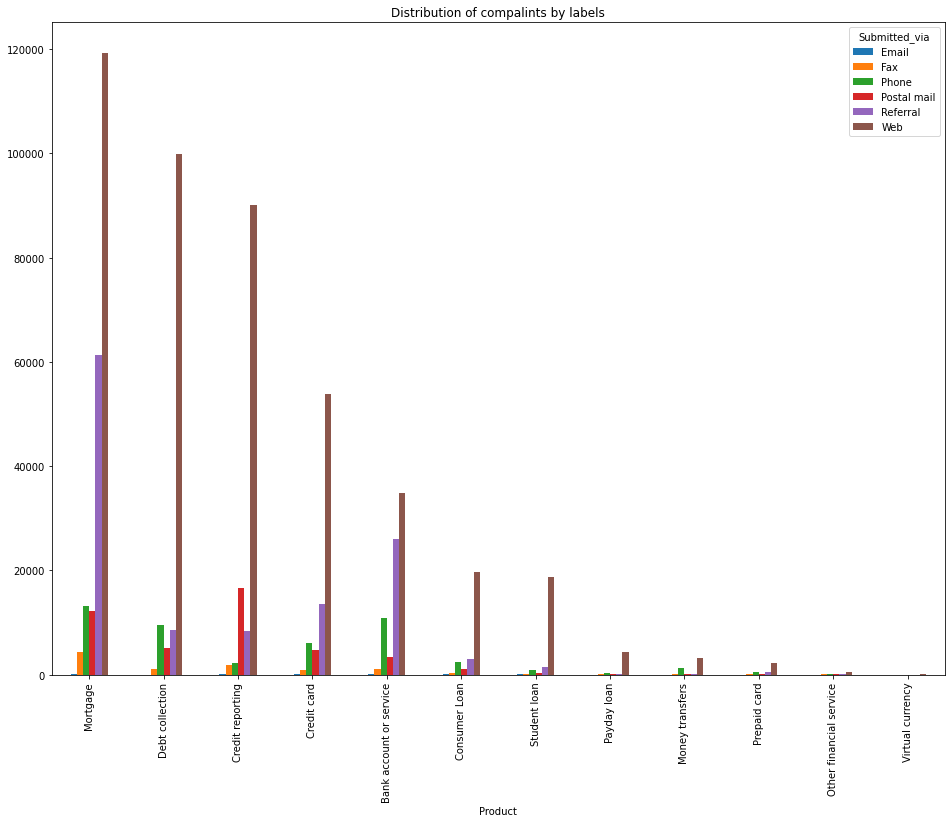

In [65]:
plt.rcParams["figure.figsize"] = (16,12)
#plt.figure(figsize=(20, 15))
pd.crosstab(data['Product'],data['Submitted_via']).reset_index().set_index('Product').sort_values('Web',ascending = False).plot(kind='bar',title = 'Distribution of compalints by labels')
plt.show()

Producing Word Cloud for : Consumer Loan


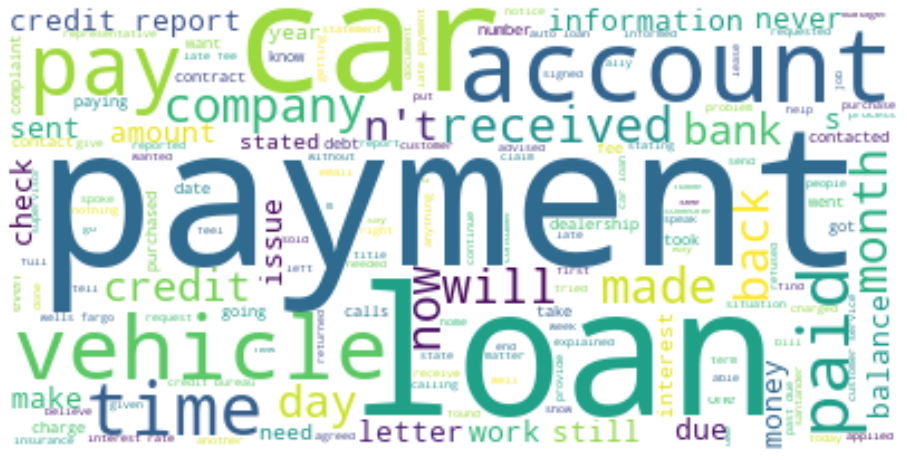

Producing Word Cloud for : Bank account or service


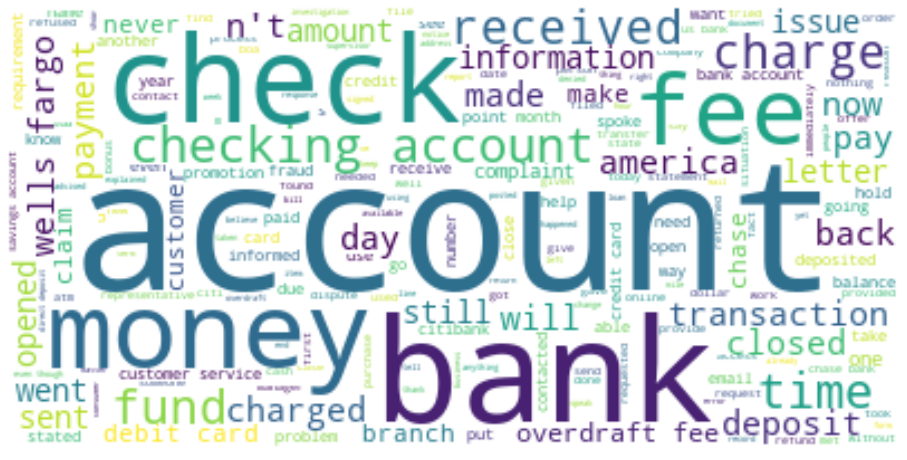

Producing Word Cloud for : Mortgage


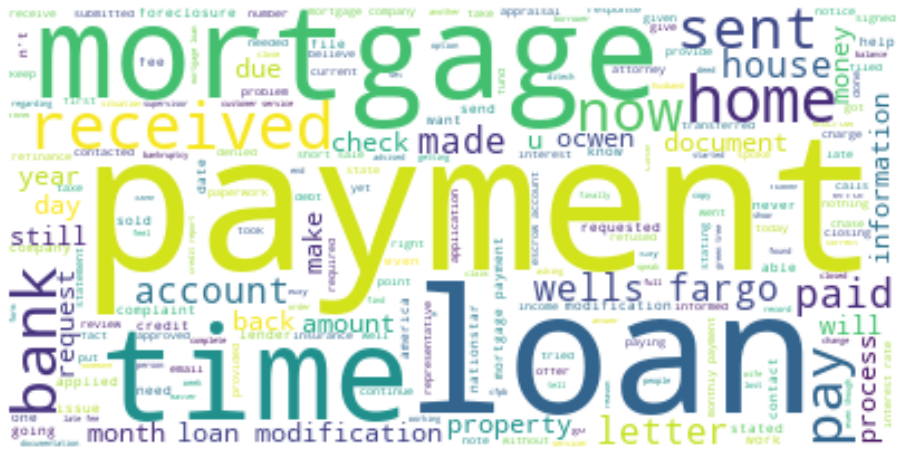

Producing Word Cloud for : Debt collection


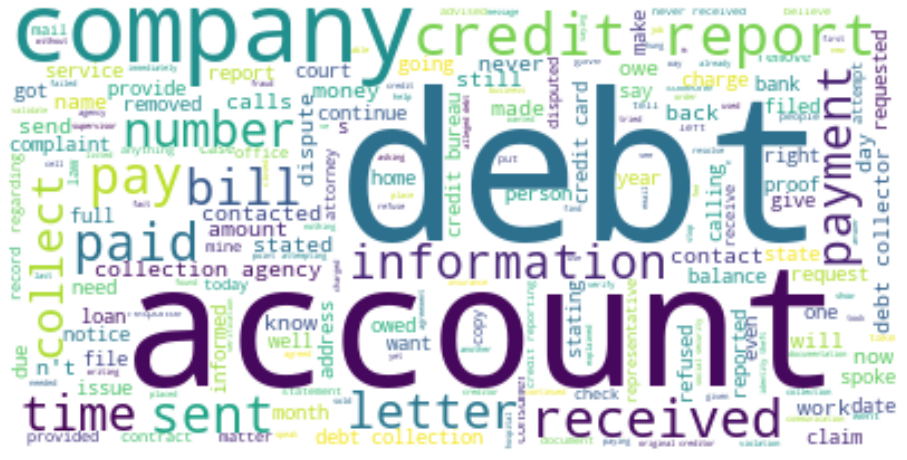

Producing Word Cloud for : Credit card


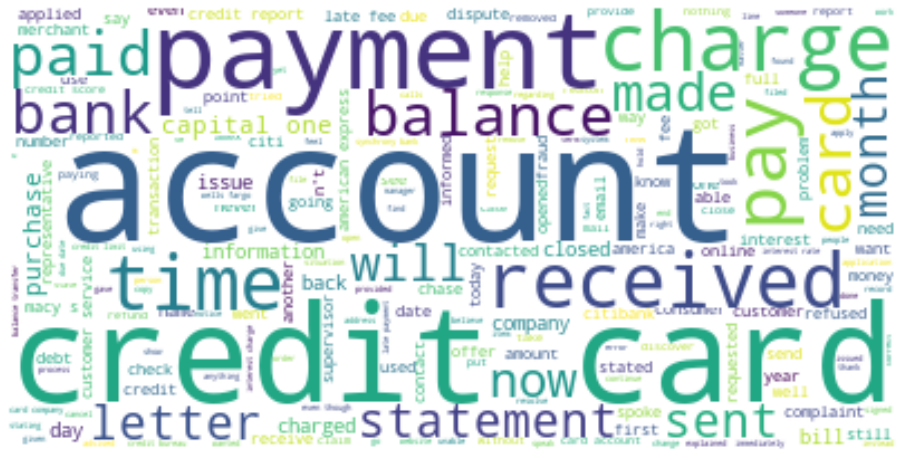

Producing Word Cloud for : Credit reporting


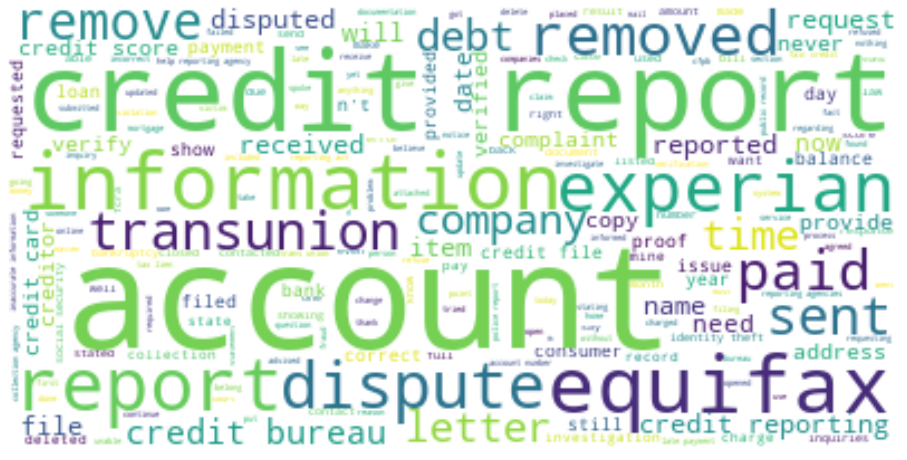

Producing Word Cloud for : Student loan


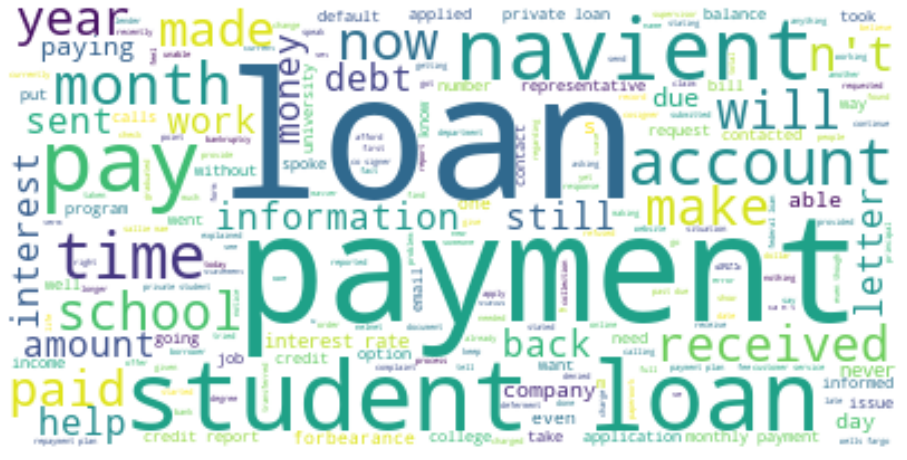

Producing Word Cloud for : Money transfers


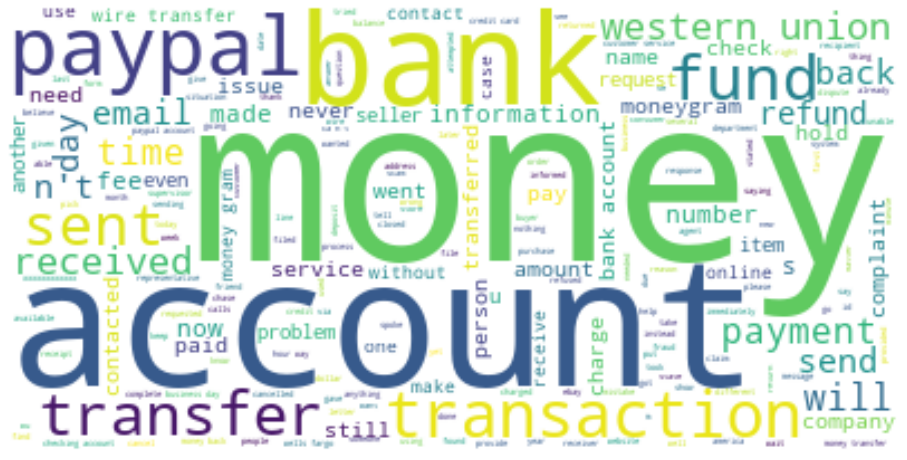

Producing Word Cloud for : Payday loan


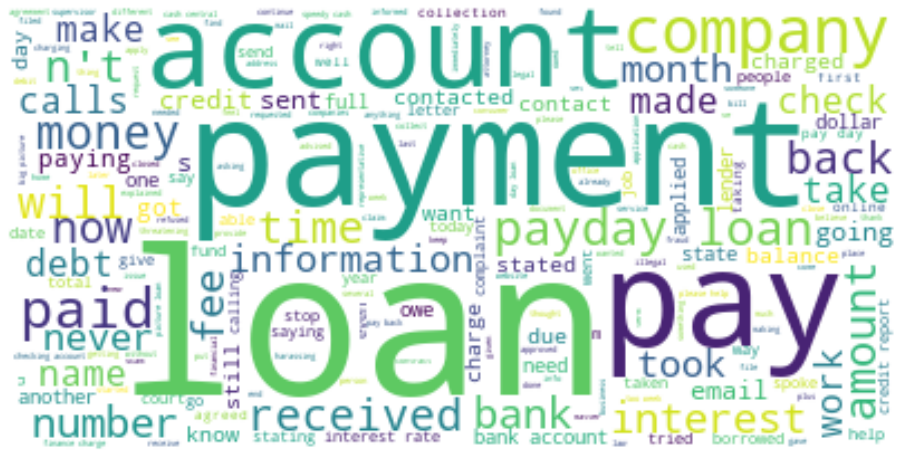

Producing Word Cloud for : Other financial service


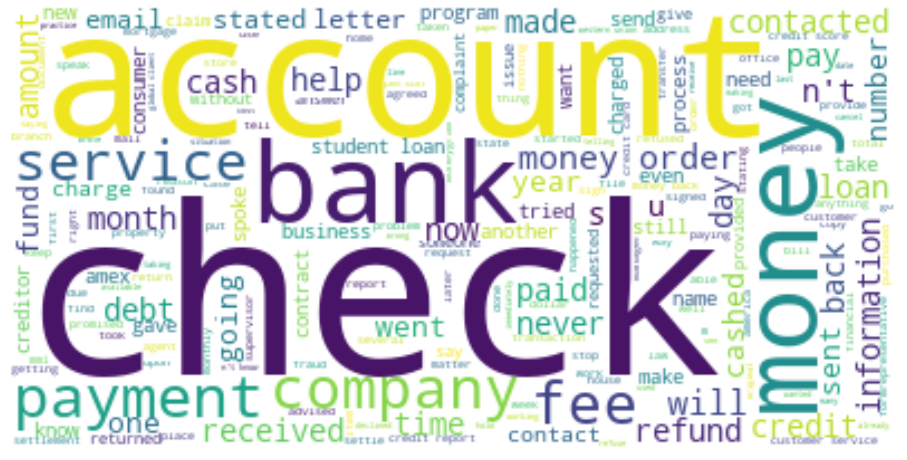

Producing Word Cloud for : Prepaid card


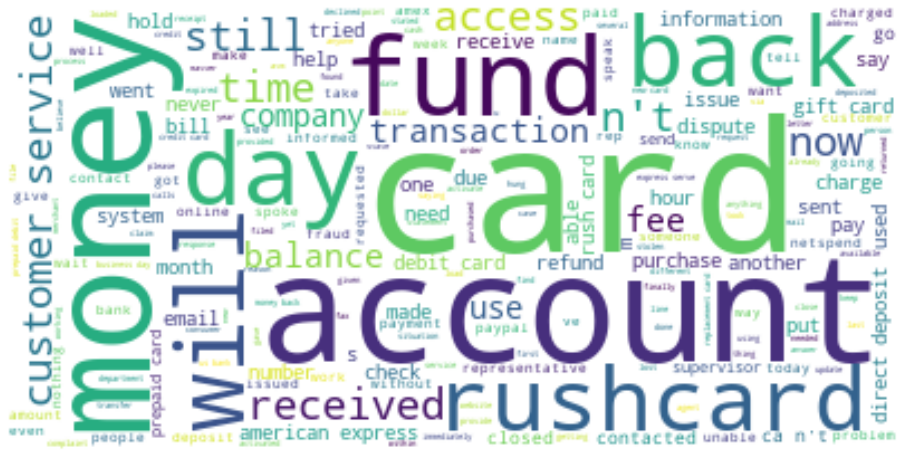

Producing Word Cloud for : Virtual currency


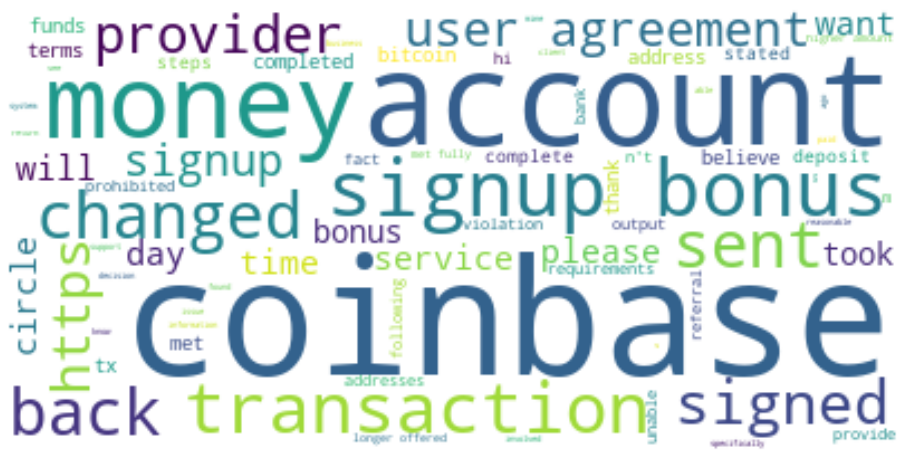

In [71]:
### Create a unqiue list fo each products
import nltk 
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

product_list = data['Product'].unique()
data.Consumer_complaint_narrative = data.Consumer_complaint_narrative.astype(str)
### Iterate through each products category 
for i in product_list:
    ### Convert the text to lower case and subset only text for product of interest
    text = " ".join(review.lower() for review in data[data['Product'] == i]['Consumer_complaint_narrative'])
    ### Import the redefine stopwords list
    stopwords = set(STOPWORDS)
    ### Extend the predefine stop words list 
    stopwords.update(["xxxx", "xx", "xxxx", "xxxxx",'said','told','phone','trying','ask','asked',"call","called", "nan"])

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

    # Display the generated image:
    # the matplotlib way:
    print ("Producing Word Cloud for :", i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show() 